Importing needed modules:

In [8]:
import numpy as np
import pandas as pd
import matplotlib as pyplot

from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial import distance

Creating a test cluster:

In [9]:
X, y = make_blobs(n_samples=1000, centers=1, cluster_std=0.9, n_features=3)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1]))

Plotting test cluster for visualisation:

In [11]:
df.head()

,x,y
0,2.269560,-8.144546
1,3.191829,-9.105592
2,1.903578,-8.535198
3,2.023689,-8.727228
4,1.960724,-9.173640


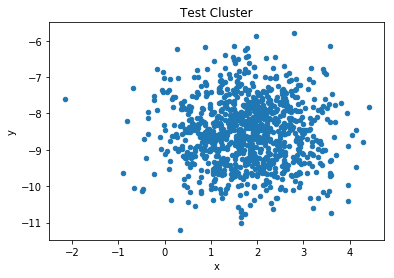

In [18]:
plt = df.plot(x='x',y='y',kind='scatter', title='Test Cluster')

In [182]:
def delta_medoids_one_shot(df, delta, similarity_measure):
    #TODO docstring
    representatives = np.empty_like([])
    
    #here starts RepAssign
    for row in df.iterrows():
        point = np.array([row[1][0], row[1][1]])
        
        dist = 100
        
        for rep in representatives: #needs optimalization
            if similarity_measure(point, rep) <= dist: #here add distance measure as parameter
                dist = similarity_measure(point, rep)
        
        if dist >= delta:
            print("Appending to representatives.")
            representatives = np.append(representatives, np.array(point))
            
    return representatives

In [183]:
cluster_repr = delta_medoids_one_shot(df, 6, distance.euclidean)

[]
Appending to representatives.
11.4124785463
11.3770386944
Appending to representatives.
10.8109546404
10.0557151512
Appending to representatives.
10.9995368586
10.1849168458
Appending to representatives.
11.447366813
10.1575352392
Appending to representatives.
9.91191712356
8.13518223203
Appending to representatives.
11.8919509101
10.3072559968
9.80221749056
9.68990116098
Appending to representatives.
9.94280760212
9.57031082385
7.86729098939
Appending to representatives.
10.3764015801
10.0642938612
10.0045306555
8.29093348442
Appending to representatives.
11.6926525164
11.1756398961
9.82737853966
Appending to representatives.
10.7221624664
7.77588692108
7.03987736962
Appending to representatives.
10.7032000599
10.3613151106
8.83271835912
8.63908570181
Appending to representatives.
11.1395259157
9.19087672801
8.81856223799
8.5122150194
Appending to representatives.
11.8329742266
9.68128987051
9.60274737038
9.06701300293
Appending to representatives.
10.4868298322
10.1339346076
8.541

8.99755288978
7.1352453694
6.88565598382
6.82493188173
Appending to representatives.
9.45056449255
9.0655430928
7.29593524265
7.06480140268
7.00893615815
Appending to representatives.
11.372689769
10.0297592943
9.24308456021
9.00152409468
8.50708450961
Appending to representatives.
11.0026014948
8.96586893874
8.63139160645
8.27350972981
8.0964701849
7.37984984379
Appending to representatives.
10.8735996604
9.15216269653
8.54734623607
8.44772765848
8.27482039997
8.26662593247
7.52608852689
Appending to representatives.
12.3016210396
10.8166318728
10.3045417994
10.2269693491
10.0798572553
10.0777445828
9.47902520641
Appending to representatives.
10.2141634931
9.95039109726
9.83805575354
8.10153899267
7.87098370472
7.81490590696
Appending to representatives.
10.9683636691
10.3609878705
8.93938207853
8.71744056484
8.66333704021
Appending to representatives.
10.1884159806
9.1263232988
7.85685943658
7.58799097175
7.31279983362
Appending to representatives.
10.6273309615
10.3666198213
10.2661

Appending to representatives.
11.8518902565
10.3815215651
9.78189775686
9.75936183403
9.54757405319
8.96170837061
Appending to representatives.
9.36144220751
9.0386985126
7.68690233225
7.5377233014
7.50336436922
Appending to representatives.
10.7899672486
10.1405711601
8.71144157705
8.48237686964
8.46659582585
8.42646353091
Appending to representatives.
12.5558385512
8.93693615534
8.40834519963
8.28092857519
7.81681457117
Appending to representatives.
11.6882763355
10.5080332302
9.65807107872
9.43132506883
9.0389303482
Appending to representatives.
9.60590242526
9.24881020272
7.66148377513
7.46511082133
7.41830955443
Appending to representatives.
11.5962052514
8.61433317103
7.98323746782
7.82568790503
7.21539321437
Appending to representatives.
10.826614759
6.01155769847
5.21690406832
5.01578937338
4.24363942083
10.4024821713
9.61584148129
8.19744990659
7.94940372571
7.85698199155
Appending to representatives.
11.0977949974
8.31671386991
7.63055545483
7.45682722157
6.76853434238
Append

8.45093814355
Appending to representatives.
11.8740842635
9.53267394335
8.92417137314
8.77150113118
8.17131769883
Appending to representatives.
11.9120938295
10.1148963332
9.7766378277
9.50234089031
9.34739627591
8.72797144956
Appending to representatives.
10.7386676011
8.5145528922
8.26343145473
7.79244274997
7.60715161653
6.85477197354
Appending to representatives.
10.4159733009
9.59888674184
8.20634710734
7.95739907787
7.84368571069
Appending to representatives.
11.7903960691
10.1979890197
9.68065068134
9.57294995181
9.44000924363
9.41411862623
8.7740148001
Appending to representatives.
8.89389225018
8.51706680759
6.82749140635
6.61782274352
6.56794758015
Appending to representatives.
11.1604448177
8.59729751366
7.91967569685
7.7479334758
7.06487023571
Appending to representatives.
8.73906876257
8.62116544033
8.30328348056
6.19716161989
5.90114285739
5.82836854545
11.1472068385
10.3485080928
9.10662723986
8.8815270216
8.75405947649
Appending to representatives.
9.74948442382
9.17742

8.71609244721
7.80324150337
7.515327581
6.91122038849
Appending to representatives.
11.4291347017
8.84079861918
8.19166830836
8.02811026634
7.38311013558
Appending to representatives.
9.88318820259
9.51230916809
7.82228143473
7.60343632526
7.5505935325
Appending to representatives.
9.28530564805
8.92692847828
7.34477094334
7.15238195328
7.1068016374
Appending to representatives.
11.7969319152
10.8847639821
9.85164950296
9.63830567241
9.41802524723
Appending to representatives.
11.6461987811
11.331182848
9.94287411388
9.76961689499
9.72802555626
Appending to representatives.
11.0804807493
9.24431857726
8.77302383681
8.55988979862
8.50255318517
8.38474236924
7.6737502155
Appending to representatives.
8.6964969325
8.31888200272
6.63330265243
6.42658845892
6.37762427765
Appending to representatives.
9.93694762942
9.57064356392
7.90919092641
7.69554579576
7.64404557681
Appending to representatives.
10.5210661171
10.3507034176
10.1593797691
8.50827456674
8.29232957872
8.23997098423
Appending

Appending to representatives.
10.2186182832
8.67737312118
7.77379488053
7.48417750843
6.86620578223
Appending to representatives.
11.3832302844
9.72736025328
9.18108944708
9.06970772963
8.92709228507
8.90183406109
8.22159914741
Appending to representatives.
11.0567438566
10.7329943583
9.30815207958
9.13171311881
9.08949133284
8.88392263521
Appending to representatives.
10.8834099952
9.02305368932
8.52650142134
8.31915981457
8.24848795605
8.13846752525
7.40197587241
Appending to representatives.
10.2990763829
10.1385139825
9.92979243409
8.23588936228
8.01313621525
7.95907816547
7.69036973826
Appending to representatives.
10.6346121032
10.2888832159
8.73782131412
8.54037760723
8.49282690806
8.25912078233
Appending to representatives.
12.1110423629
10.4811293425
10.0487127806
9.88085758472
9.81424715993
9.72898848457
9.12070959841
Appending to representatives.
10.2113174729
9.85138294934
8.22224286121
8.01279578267
7.96227395746
7.71351009882
Appending to representatives.
11.4863016983
8.

7.92141781755
7.4179348815
7.30084413669
6.90809063063
Appending to representatives.
9.29090426498
8.90650527153
7.14748958889
6.91992365394
6.86508872952
6.59602341233
Appending to representatives.
9.39955012505
8.93304278336
6.99558656216
6.71979546401
6.65209025803
6.31013443022
Appending to representatives.
10.5690901335
7.79382090551
7.04096915837
6.84770844758
6.06664996659
Appending to representatives.
9.82072846776
9.46015257713
7.84114485767
7.63675357308
7.58774019538
7.34877370187
Appending to representatives.
11.712457117
10.3442753727
9.64152026374
9.40783312316
8.89130896523
Appending to representatives.
11.9678701506
10.9966528635
10.0378461473
9.82600435143
9.56341090259
9.51367133272
Appending to representatives.
9.43053982469
9.40215557029
9.0311361964
7.16274374489
6.91161031645
6.85045819434
6.5453904795
Appending to representatives.
10.5962285075
10.0674118497
8.50520752618
8.27541547861
8.219383574
7.93872196052
Appending to representatives.
10.9751345823
9.781261

KeyboardInterrupt: 

In [161]:
cluster_repr.size

1

In [193]:
e = np.empty_like([], dtype=np.ndarray)
e = np.append(e, np.array(np.array([2, 2])))
e
#e = np.append(e, np.array(np.array([2, 2])))

array([2, 2], dtype=object)

In [188]:
a = np.array([2.2, 2.2])
type(a)

numpy.ndarray